In [16]:
import pandas as pd
import numpy as np
x=pd.read_excel("DATASET.xlsx")
df=pd.DataFrame(x);
df.rename(columns={'Unnamed: 0': 'section'}, inplace=True)
df.shape

C:\Users\lovit\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lovit\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


(1009, 15)

In [17]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
df
df.fillna(0,inplace=True)
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10
test=df[df['year']==10]
test

,section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [26]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
model=GBR(random_state=25, verbose=1)
pre_col=['Para-9','Para-10','Para-11','Para-12','Para-13']
rmse=[]
n = 0
ind = 0
data_pre = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
for j in [10, 11, 12, 13, 14]:
    
    a = 0
    co = 0
    for i in range(0, 1000, 10):
        x_testing = df.iloc[i+9, 1:10].to_numpy()
        y_testing = df.iloc[i+9, j]
        x_training = df.iloc[i:i+9, 1:10]
        y_training = df.iloc[i:i+9, j]
        model.fit(x_training, y_training)
        y_pre = model.predict(x_testing.reshape(1,-1))[0]
        data_pre[pre_col[ind]].append(y_pre)
        a += (y_testing - y_pre)*(y_testing - y_pre)
        co += 1
        n += 1
    rmse.append(a)
    ind += 1
      

      Iter       Train Loss   Remaining Time 
         1           0.9158            0.10s
         2           0.7418            0.05s
         3           0.6009            0.03s
         4           0.4867            0.02s
         5           0.3942            0.02s
         6           0.3193            0.07s
         7           0.2586            0.06s
         8           0.2095            0.05s
         9           0.1697            0.05s
        10           0.1375            0.05s
        20           0.0167            0.03s
        30           0.0020            0.02s
        40           0.0002            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         539.5540            0.00s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         1        1397.1484            0.42s
         2        1131.6967            0.23s
         3         916.6807            0.17s
         4         742.5128            0.15s
         5         601.4367            0.13s
         6         487.1651            0.11s
         7         394.6051            0.09s
         8         319.6315            0.09s
         9         258.9028            0.08s
        10         209.7124            0.08s
        20          25.4977            0.04s
        30           3.1002            0.03s
        40           0.3770            0.02s
        50           0.0458            0.02s
        60           0.0056            0.01s
        70           0.0007            0.01s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.00s
         2           0.0000            0.14s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         6        5529.1892            0.24s
         7        4481.5668            0.21s
         8        3632.9480            0.18s
         9        2944.2689            0.16s
        10        2386.5703            0.14s
        20         292.4065            0.08s
        30          35.8872            0.04s
        40           4.4081            0.03s
        50           0.5421            0.02s
        60           0.0667            0.02s
        70           0.0082            0.01s
        80           0.0010            0.01s
        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         439.0091            0.00s
         2         355.8635            0.00s
         3         288.5156            0.00s
         4         233.9638            0.00s
         5         189.7624            0.00s
         6         153.9106            0.00s
         7         124.8622            0.00s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        20          63.5431            0.04s
        30           7.7254            0.03s
        40           0.9392            0.02s
        50           0.1142            0.01s
        60           0.0139            0.01s
        70           0.0017            0.01s
        80           0.0002            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         181.6038            0.00s
         2         147.0991            0.17s
         3         119.1503            0.11s
         4          96.5117            0.08s
         5          78.1745            0.07s
         6          63.3213            0.05s
         7          51.2903            0.05s
         8          41.5451            0.04s
         9          33.6516            0.03s
        10          27.2578            0.03s
        20           3.3139            0.03s
        30           0.4029            0.02s
        4

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        40           0.0004            0.03s
        50           0.0000            0.02s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         468.0568            0.00s
         2         379.1648            0.00s
         3         307.1622            0.00s
         4         248.8402            0.00s
         5         201.5993            0.00s
         6         163.3343            0.00s
         7         132.3395            0.00s
         8         107.2338            0.00s
         9          86.8982            0.00s
        10          70.4248            0.00s
        20           8.6146            0.03s
        30           1.0490            0.02s
        40           0.1279            0.01s
        50           0.0156            0.01s
        6

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        40           0.0005            0.02s
        50           0.0001            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         730.0047            0.00s
         2         591.7017            0.17s
         3         479.6351            0.13s
         4         388.7937            0.10s
         5         315.1837            0.09s
         6         255.5090            0.08s
         7         207.1530            0.06s
         8         167.9467            0.06s
         9         136.1763            0.05s
        10         110.4137            0.04s
        20          13.5636            0.02s
        30           1.6685            0.01s
        40           0.2060            0.02s
        50           0.0255            0.01s
        6

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        20          11.8365            0.03s
        30           1.4390            0.02s
        40           0.1750            0.01s
        50           0.0213            0.01s
        60           0.0026            0.01s
        70           0.0003            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          16.2800            0.00s
         2          13.1868            0.00s
         3          10.6813            0.00s
         4           8.6519            0.00s
         5           7.0080            0.16s
         6           5.6765            0.14s
         7           4.5980            0.12s
         8           3.7243            0.12s
         9           3.0167            0.10s
        10           2.4435            0.11s
        20           0.2971            0.05s
        30           0.0361            0.03s
        4

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        80           0.0002            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1857.7724            0.19s
         2        1504.7956            0.10s
         3        1218.8845            0.07s
         4         987.2964            0.05s
         5         799.7101            0.04s
         6         647.7652            0.03s
         7         524.6898            0.03s
         8         424.9987            0.07s
         9         344.2490            0.07s
        10         278.8417            0.06s
        20          33.9006            0.04s
        30           4.1215            0.03s
        40           0.5011            0.02s
        50           0.0609            0.01s
        60           0.0074            0.01s
        70           0.0009            0.01s
        80           0.0001            0.00s
        90           0.0000            0.00s
       10

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         8           0.0183            0.09s
         9           0.0148            0.10s
        10           0.0120            0.08s
        20           0.0015            0.04s
        30           0.0002            0.03s
        40           0.0000            0.02s
        50           0.0000            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3656            0.00s
         2           0.2961            0.40s
         3           0.2399            0.26s
         4           0.1943            0.19s
         5           0.1574            0.15s
         6           0.1275            0.13s
         7           0.1033            0.11s
         8           0.0836            0.09s
         9           0.0677            0.08s
        1

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        40           0.0009            0.03s
        50           0.0001            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0000            0.00s
         2           0.0000            0.00s
         3           0.0000            0.00s
         4           0.0000            0.00s
         5           0.0000            0.00s
         6           0.0000            0.00s
         7           0.0000            0.00s
         8           0.0000            0.00s
         9           0.0000            0.00s
        10           0.0000            0.00s
        20           0.0000            0.02s
        30           0.0000            0.02s
        40           0.0000            0.01s
        50           0.0000            0.01s
        6

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        30           0.0000            0.04s
        40           0.0000            0.02s
        50           0.0000            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         431.2730            0.28s
         2         349.3653            0.16s
         3         283.0201            0.11s
         4         229.2805            0.08s
         5         185.7510            0.08s
         6         150.4831            0.07s
         7         121.9160            0.07s
         8          98.7699            0.06s
         9          80.0216            0.06s
        10          64.8306            0.05s
        20           7.9052            0.03s
        30           0.9659            0.02s
        40           0.1184            0.02s
        5

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        10         443.5761            0.08s
        20          54.7997            0.04s
        30           6.7267            0.02s
        40           0.8257            0.01s
        50           0.1010            0.01s
        60           0.0124            0.01s
        70           0.0015            0.00s
        80           0.0002            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        4090.1852            0.00s
         2        3313.0500            0.00s
         3        2683.5705            0.00s
         4        2173.6921            0.00s
         5        1760.6906            0.00s
         6        1426.1594            0.00s
         7        1155.1891            0.00s
         8         935.7032            0.00s
         9         757.9196            0.00s
        10         613.9149            0.00s
        20          74.6377            0.00s
        3

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.0600            0.00s
         2           2.4786            0.00s
         3           2.0077            0.00s
         4           1.6262            0.00s
         5           1.3172            0.13s
         6           1.0670            0.12s
         7           0.8642            0.10s
         8           0.7000            0.09s
         9           0.5670            0.08s
        10           0.4593            0.07s
        20           0.0558            0.03s
        30           0.0068            0.03s
        40           0.0008            0.02s
        50           0.0001            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       10

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


      Iter       Train Loss   Remaining Time 
         1         502.0319            0.00s
         2         406.9097            0.00s
         3         329.8608            0.00s
         4         267.4511            0.05s
         5         216.8993            0.05s
         6         175.9932            0.04s
         7         142.7799            0.03s
         8         115.8678            0.04s
         9          93.9763            0.04s
        10          76.2521            0.05s
        20           9.4252            0.03s
        30           1.1654            0.01s
        40           0.1442            0.02s
        50           0.0177            0.01s
        60           0.0021            0.01s
        70           0.0003            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         227.2917            0.07s
       

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         5        2499.7551            0.00s
         6        2032.8560            0.00s
         7        1653.8274            0.00s
         8        1346.1449            0.00s
         9        1093.5789            0.00s
        10         889.0005            0.00s
        20         113.3655            0.02s
        30          14.5002            0.02s
        40           1.8001            0.01s
        50           0.2240            0.01s
        60           0.0277            0.01s
        70           0.0034            0.01s
        80           0.0004            0.00s
        90           0.0001            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2118.6072            0.00s
         2        1716.0718            0.00s
         3        1390.0182            0.00s
         4        1125.9147            0.00s
         5         911.9909            0.00s
         6         738.7127            0.00s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         134.0047            0.00s
         2         108.6733            0.00s
         3          88.1326            0.00s
         4          71.4885            0.00s
         5          57.9900            0.00s
         6          47.0523            0.00s
         7          38.1801            0.00s
         8          30.9911            0.00s
         9          25.1448            0.00s
        10          20.4168            0.00s
        20           2.5408            0.03s
        30           0.3165            0.02s
        40           0.0395            0.01s
        50           0.0049            0.01s
        60           0.0006            0.01s
        70           0.0001            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        70           0.0007            0.01s
        80           0.0001            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1935.4752            0.10s
         2        1569.1731            0.08s
         3        1272.4684            0.07s
         4        1032.1376            0.06s
         5         837.4697            0.05s
         6         679.1610            0.05s
         7         551.1644            0.04s
         8         447.4872            0.04s
         9         362.8401            0.04s
        10         294.2760            0.05s
        20          36.5310            0.03s
        30           4.5357            0.02s
        40           0.5652            0.02s
        50           0.0698            0.01s
        60           0.0086            0.01s
        70           0.0011            0.01s
        80           0.0001            0.00s
        9

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2313.1603            0.00s
         2        1875.4382            0.00s
         3        1519.6929            0.00s
         4        1231.5392            0.10s
         5         998.1348            0.08s
         6         809.1061            0.06s
         7         655.8061            0.05s
         8         531.6685            0.05s
         9         430.9756            0.04s
        10         349.4509            0.04s
        20          42.9956            0.03s
        30           5.3099            0.02s
        40           0.6561            0.01s
        50           0.0813            0.01s
        60           0.0101            0.01s
        70           0.0013            0.01s
        80           0.0002            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         8           0.0183            0.04s
         9           0.0148            0.04s
        10           0.0120            0.04s
        20           0.0015            0.03s
        30           0.0002            0.02s
        40           0.0000            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          86.1967            0.16s
         2          70.0198            0.08s
         3          56.9102            0.07s
         4          46.2556            0.05s
         5          37.5058            0.05s
         6          30.4185            0.04s
         7          24.6682            0.05s
         8          20.0096            0.04s
         9          16.2290            0.04s
        1

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         5         424.9156            0.09s
         6         344.4113            0.09s
         7         279.2029            0.08s
         8         226.3840            0.08s
         9         183.5880            0.07s
        10         148.8728            0.07s
        20          18.3695            0.04s
        30           2.2716            0.02s
        40           0.2810            0.02s
        50           0.0348            0.01s
        60           0.0043            0.01s
        70           0.0005            0.01s
        80           0.0001            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         678.1231            0.00s
         2         549.5436            0.12s
         3         445.3942            0.10s
         4         361.0332            0.08s
         5         292.6282            0.07s
         6         237.2202            0.05s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        30           0.9109            0.02s
        40           0.1116            0.01s
        50           0.0137            0.01s
        60           0.0017            0.01s
        70           0.0002            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        8689.3206            0.00s
         2        7039.3168            0.00s
         3        5702.8136            0.00s
         4        4620.2461            0.05s
         5        3743.3664            0.06s
         6        3033.0938            0.05s
         7        2457.7730            0.05s
         8        1991.7632            0.04s
         9        1614.2952            0.03s
        10        1308.4413            0.03s
        20         160.1822            0.03s
        30          19.6130            0.02s
        40           2.3994            0.01s
        5

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         7          87.4304            0.09s
         8          70.9176            0.08s
         9          57.5349            0.07s
        10          46.6754            0.06s
        20           5.7641            0.04s
        30           0.7134            0.02s
        40           0.0883            0.02s
        50           0.0109            0.02s
        60           0.0014            0.01s
        70           0.0002            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        1248.5444            0.00s
         2        1011.5884            0.00s
         3         819.6540            0.00s
         4         664.1872            0.00s
         5         538.2590            0.04s
         6         436.2572            0.04s
         7         353.6357            0.04s
         8         286.7124            0.04s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         8         200.3732            0.19s
         9         162.3023            0.16s
        10         131.4649            0.15s
        20          15.9831            0.08s
        30           1.9432            0.05s
        40           0.2362            0.03s
        50           0.0287            0.03s
        60           0.0035            0.02s
        70           0.0004            0.01s
        80           0.0001            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0800            0.00s
         2           0.0648            0.00s
         3           0.0525            0.00s
         4           0.0425            0.00s
         5           0.0344            0.00s
         6           0.0279            0.00s
         7           0.0226            0.00s
         8           0.0183            0.00s
         9           0.0148            0.00s
        1

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         719.0114            0.00s
         2         582.6631            0.00s
         3         472.2210            0.00s
         4         382.9625            0.00s
         5         310.4291            0.00s
         6         251.6518            0.00s
         7         204.0196            0.00s
         8         165.5029            0.00s
         9         134.1824            0.00s
        10         108.8543            0.00s
        20          13.4192            0.03s
        30           1.6608            0.02s
        40           0.2061            0.01s
        50           0.0256            0.01s
        60           0.0032            0.01s
        70           0.0004            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         3          56.6027            0.51s
         4          45.9592            0.38s
         5          37.3368            0.30s
         6          30.3292            0.25s
         7          24.6492            0.21s
         8          20.0307            0.18s
         9          16.2871            0.16s
        10          13.2424            0.14s
        20           1.6708            0.08s
        30           0.2113            0.05s
        40           0.0268            0.03s
        50           0.0034            0.02s
        60           0.0004            0.02s
        70           0.0001            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           3.0200            0.00s
         2           2.4462            0.00s
         3           1.9814            0.00s
         4           1.6050            0.00s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0002            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         227.0528            0.03s
         2         183.9644            0.01s
         3         149.0548            0.01s
         4         120.7775            0.01s
         5          97.8669            0.01s
         6          79.3093            0.00s
         7          64.2730            0.00s
         8          52.0936            0.00s
         9          42.2245            0.00s
        10          34.2281            0.00s
        20           4.2126            0.00s
        30           0.5196            0.02s
        40           0.0634            0.01s
        50           0.0077            0.02s
        60           0.0009            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0001            0.01s
        60           0.0000            0.01s
        70           0.0000            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          39.0800            0.00s
         2          31.6548            0.00s
         3          25.6404            0.26s
         4          20.7687            0.19s
         5          16.8227            0.15s
         6          13.6264            0.13s
         7          11.0373            0.11s
         8           8.9403            0.09s
         9           7.2416            0.08s
        10           5.8657            0.07s
        20           0.7131            0.03s
        30           0.0867            0.02s
        40           0.0105            0.01s
        50           0.0013            0.02s
        60           0.0002            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        60           0.0004            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         166.5341            0.00s
         2         134.9067            0.00s
         3         109.2885            0.27s
         4          88.5340            0.21s
         5          71.7229            0.16s
         6          58.1032            0.13s
         7          47.0712            0.11s
         8          38.1333            0.10s
         9          30.8936            0.09s
        10          25.0280            0.08s
        20           3.0504            0.06s
        30           0.3725            0.04s
        40           0.0455            0.02s
        50           0.0056            0.02s
        60           0.0007            0.01s
        70           0.0001            0.01s
        8

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


        30           0.0059            0.02s
        40           0.0007            0.02s
        50           0.0001            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           7.8200            0.00s
         2           6.3342            0.00s
         3           5.1307            0.00s
         4           4.1559            0.00s
         5           3.3663            0.00s
         6           2.7267            0.00s
         7           2.2086            0.00s
         8           1.7890            0.00s
         9           1.4491            0.00s
        10           1.1737            0.00s
        20           0.1427            0.04s
        30           0.0173            0.02s
        40           0.0021            0.02s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2600            0.00s
         2           1.0206            0.00s
         3           0.8267            0.00s
         4           0.6696            0.00s
         5           0.5424            0.00s
         6           0.4393            0.00s
         7           0.3559            0.00s
         8           0.2882            0.00s
         9           0.2335            0.00s
        10           0.1891            0.00s
        20           0.0230            0.00s
        30           0.0028            0.00s
        40           0.0003            0.00s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.00s
        8

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0719            0.01s
        60           0.0089            0.01s
        70           0.0011            0.01s
        80           0.0001            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.8400            0.00s
         2           2.3004            0.30s
         3           1.8633            0.21s
         4           1.5093            0.18s
         5           1.2225            0.14s
         6           0.9902            0.13s
         7           0.8021            0.11s
         8           0.6497            0.10s
         9           0.5263            0.09s
        10           0.4263            0.08s
        20           0.0518            0.03s
        30           0.0063            0.02s
        40           0.0008            0.02s
        50           0.0001            0.02s
        60           0.0000            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        20           3.9314            0.04s
        30           0.4783            0.02s
        40           0.0582            0.01s
        50           0.0071            0.01s
        60           0.0009            0.01s
        70           0.0001            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.8600            0.00s
         2           3.9366            0.00s
         3           3.1886            0.00s
         4           2.5828            0.00s
         5           2.0921            0.06s
         6           1.6946            0.06s
         7           1.3726            0.05s
         8           1.1118            0.04s
         9           0.9006            0.04s
        10           0.7295            0.03s
        20           0.0887            0.02s
        30           0.0108            0.02s
        4

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1600            0.08s
         2           0.9396            0.07s
         3           0.7611            0.06s
         4           0.6165            0.06s
         5           0.4993            0.06s
         6           0.4045            0.06s
         7           0.3276            0.05s
         8           0.2654            0.04s
         9           0.2150            0.04s
        10           0.1741            0.03s
        20           0.0212            0.02s
        30           0.0026            0.02s
        40           0.0003            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


         1           0.6200            0.00s
         2           0.5022            0.00s
         3           0.4068            0.04s
         4           0.3295            0.05s
         5           0.2669            0.05s
         6           0.2162            0.05s
         7           0.1751            0.04s
         8           0.1418            0.04s
         9           0.1149            0.03s
        10           0.0931            0.03s
        20           0.0113            0.01s
        30           0.0014            0.02s
        40           0.0002            0.01s
        50           0.0000            0.01s
        60           0.0000            0.00s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.6000            0.06s
         2           2.1060            0.05s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


         1           1.8000            0.08s
         2           1.4580            0.06s
         3           1.1810            0.05s
         4           0.9566            0.05s
         5           0.7748            0.04s
         6           0.6276            0.03s
         7           0.5084            0.03s
         8           0.4118            0.02s
         9           0.3335            0.02s
        10           0.2702            0.02s
        20           0.0328            0.03s
        30           0.0040            0.02s
        40           0.0005            0.02s
        50           0.0001            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8600            0.00s
         2           0.6966            0.00s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        20           0.0066            0.02s
        30           0.0008            0.02s
        40           0.0001            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3400            0.00s
         2           1.0854            0.00s
         3           0.8792            0.00s
         4           0.7121            0.00s
         5           0.5768            0.00s
         6           0.4672            0.12s
         7           0.3785            0.10s
         8           0.3065            0.09s
         9           0.2483            0.08s
        10           0.2011            0.07s
        20           0.0245            0.03s
        30           0.0030            0.02s
        4

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           2.1200            0.08s
         2           1.7172            0.05s
         3           1.3909            0.03s
         4           1.1267            0.02s
         5           0.9126            0.02s
         6           0.7392            0.01s
         7           0.5988            0.01s
         8           0.4850            0.01s
         9           0.3928            0.01s
        10           0.3182            0.01s
        20           0.0387            0.00s
        30           0.0047            0.00s
        40           0.0006            0.01s
        50           0.0001            0.01s
        60           0.0000            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

      Iter       Train Loss   Remaining Time 
         1           0.5600            0.00s
         2           0.4536            0.00s
         3           0.3674            0.00s
         4           0.2976            0.00s
         5           0.2411            0.00s
         6           0.1953            0.00s
         7           0.1582            0.00s
         8           0.1281            0.00s
         9           0.1038            0.00s
        10           0.0841            0.00s
        20           0.0102            0.00s
        30           0.0012            0.02s
        40           0.0002            0.01s
        50           0.0000            0.01s
        60           0.0000            0.00s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           6.1200            0.00s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3400            0.00s
         2           1.0854            0.00s
         3           0.8792            0.00s
         4           0.7121            0.16s
         5           0.5768            0.14s
         6           0.4672            0.11s
         7           0.3785            0.11s
         8           0.3065            0.09s
         9           0.2483            0.08s
        10           0.2011            0.07s
        20           0.0245            0.03s
        30           0.0030            0.02s
        40           0.0004            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        9

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        20           0.0628            0.01s
        30           0.0076            0.02s
        40           0.0009            0.02s
        50           0.0001            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           4.4000            0.00s
         2           3.5640            0.00s
         3           2.8868            0.00s
         4           2.3383            0.00s
         5           1.8941            0.00s
         6           1.5342            0.00s
         7           1.2427            0.00s
         8           1.0066            0.00s
         9           0.8153            0.09s
        10           0.6604            0.08s
        20           0.0803            0.03s
        30           0.0098            0.02s
        4

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        30           0.0012            0.02s
        40           0.0001            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4000            0.00s
         2           1.1340            0.00s
         3           0.9185            0.00s
         4           0.7440            0.00s
         5           0.6027            0.00s
         6           0.4881            0.00s
         7           0.3954            0.00s
         8           0.3203            0.00s
         9           0.2594            0.00s
        10           0.2101            0.00s
        20           0.0255            0.00s
        30           0.0031            0.02s
        40           0.0004            0.01s
        5

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         1           0.0110            0.06s
         2           0.0090            0.09s
         3           0.0074            0.06s
         4           0.0061            0.04s
         5           0.0050            0.03s
         6           0.0041            0.06s
         7           0.0033            0.06s
         8           0.0027            0.05s
         9           0.0022            0.05s
        10           0.0018            0.04s
        20           0.0003            0.02s
        30           0.0000            0.01s
        40           0.0000            0.01s
        50           0.0000            0.00s
        60           0.0000            0.00s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0257            0.07s
         2           0.0209            0.07s
         

        40           0.0000            0.04s
        50           0.0000            0.03s
        60           0.0000            0.02s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0124            0.00s
         2           0.0101            0.00s
         3           0.0082            0.00s
         4           0.0067            0.00s
         5           0.0054            0.00s
         6           0.0044            0.00s
         7           0.0036            0.00s
         8           0.0029            0.00s
         9           0.0024            0.00s
        10           0.0019            0.00s
        20           0.0002            0.03s
        30           0.0000            0.02s
        40           0.0000            0.01s
        50           0.0000            0.01s
        6

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


         1           0.0570            0.15s
         2           0.0462            0.10s
         3           0.0374            0.08s
         4           0.0303            0.08s
         5           0.0245            0.07s
         6           0.0199            0.06s
         7           0.0161            0.05s
         8           0.0130            0.04s
         9           0.0106            0.04s
        10           0.0086            0.03s
        20           0.0011            0.02s
        30           0.0001            0.02s
        40           0.0000            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0104            0.12s
         2           0.0085            0.09s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         6           0.0076            0.08s
         7           0.0062            0.07s
         8           0.0050            0.07s
         9           0.0041            0.07s
        10           0.0033            0.06s
        20           0.0004            0.03s
        30           0.0000            0.03s
        40           0.0000            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.01s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0527            0.00s
         2           0.0427            0.00s
         3           0.0346            0.00s
         4           0.0280            0.00s
         5           0.0227            0.00s
         6           0.0184            0.00s
         7           0.0149            0.00s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0454            0.00s
         2           0.0368            0.00s
         3           0.0298            0.16s
         4           0.0241            0.13s
         5           0.0195            0.13s
         6           0.0158            0.11s
         7           0.0128            0.11s
         8           0.0104            0.10s
         9           0.0084            0.09s
        10           0.0068            0.08s
        20           0.0008            0.05s
        30           0.0001            0.03s
        40           0.0000            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0016            0.00s
         2           0.0013            0.00s
         3           0.0011            0.00s
         4           0.0009            0.00s
         5           0.0007            0.00s
         6           0.0006            0.12s
         7           0.0005            0.11s
         8           0.0004            0.10s
         9           0.0003            0.09s
        10           0.0003            0.08s
        20           0.0000            0.04s
        30           0.0000            0.03s
        40           0.0000            0.02s
        50           0.0000            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        8

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


         1           0.0027            0.00s
         2           0.0022            0.06s
         3           0.0018            0.06s
         4           0.0014            0.05s
         5           0.0012            0.05s
         6           0.0009            0.05s
         7           0.0008            0.05s
         8           0.0006            0.05s
         9           0.0005            0.04s
        10           0.0004            0.04s
        20           0.0001            0.03s
        30           0.0000            0.02s
        40           0.0000            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0080            0.00s
         2           0.0065            0.25s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

        50           0.0000            0.02s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0050            0.23s
         2           0.0040            0.11s
         3           0.0033            0.07s
         4           0.0027            0.06s
         5           0.0022            0.04s
         6           0.0017            0.04s
         7           0.0014            0.03s
         8           0.0011            0.03s
         9           0.0009            0.02s
        10           0.0008            0.05s
        20           0.0001            0.03s
        30           0.0000            0.02s
        40           0.0000            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        7

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0064            0.00s
         2           0.0052            0.00s
         3           0.0042            0.00s
         4           0.0034            0.00s
         5           0.0028            0.00s
         6           0.0022            0.00s
         7           0.0018            0.00s
         8           0.0015            0.00s
         9           0.0012            0.00s
        10           0.0010            0.00s
        20           0.0001            0.00s
        30           0.0000            0.00s
        40           0.0000            0.00s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk


         1           0.0012            0.16s
         2           0.0010            0.08s
         3           0.0008            0.05s
         4           0.0006            0.04s
         5           0.0005            0.07s
         6           0.0004            0.06s
         7           0.0003            0.05s
         8           0.0003            0.04s
         9           0.0002            0.05s
        10           0.0002            0.05s
        20           0.0000            0.03s
        30           0.0000            0.02s
        40           0.0000            0.01s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0012            0.08s
         2           0.0009            0.09s
        

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sk

         7           0.0044            0.11s
         8           0.0035            0.10s
         9           0.0029            0.09s
        10           0.0023            0.10s
        20           0.0003            0.05s
        30           0.0000            0.03s
        40           0.0000            0.02s
        50           0.0000            0.01s
        60           0.0000            0.01s
        70           0.0000            0.01s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0125            0.56s
         2           0.0101            0.27s
         3           0.0082            0.18s
         4           0.0066            0.13s
         5           0.0054            0.11s
         6           0.0044            0.09s
         7           0.0035            0.07s
         8           0.0029            0.10s
         

C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\lovit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [27]:
print((sum(rmse)/n)**0.5)

37.67605336248286


In [28]:
data_predict = pd.DataFrame.from_dict(data_pre)
data_predict

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.399925,58.278580,56.998654,7.999923,1.912532
1,58.314798,29.953989,0.999979,7.999894,0.791941
2,73.665134,0.000000,0.000000,13.999833,1.387020
3,22.188173,57.083909,61.624448,7.960982,1.875474
4,0.000000,258.230811,33.999935,5.999959,1.694713
...,...,...,...,...,...
95,188.968064,188.571606,9.769371,7.733571,1.549435
96,5.064623,70.455168,23.751572,11.999968,1.075392
97,112.740099,64.650137,13.656704,11.459615,0.920170
98,102.693264,265.175867,130.892293,11.428832,2.062073


{'Para-9': 10, 'Para-10': 11, 'Para-11': 12, 'Para-12': 13, 'Para-13': 14}


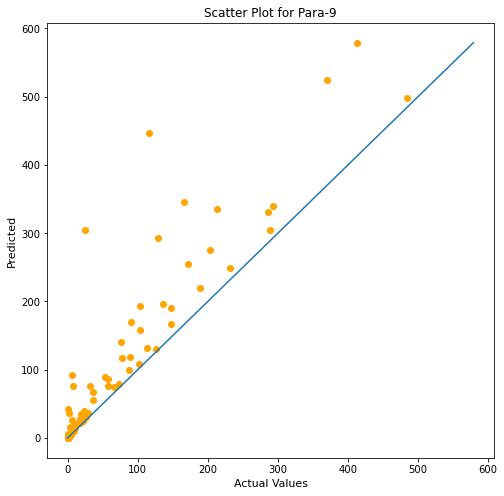

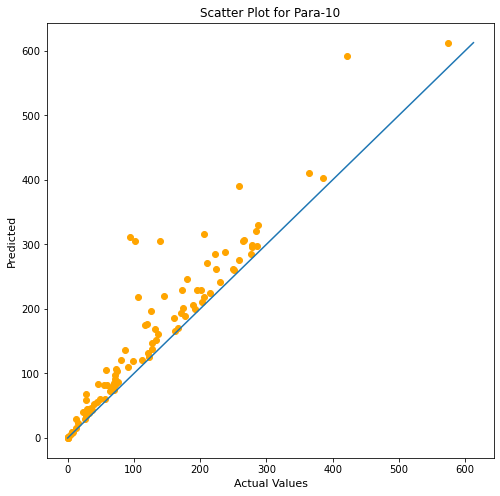

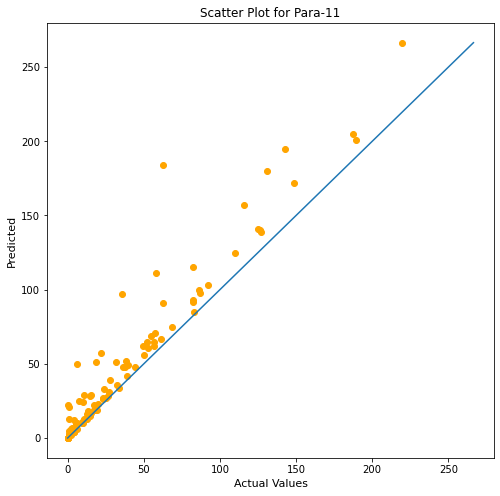

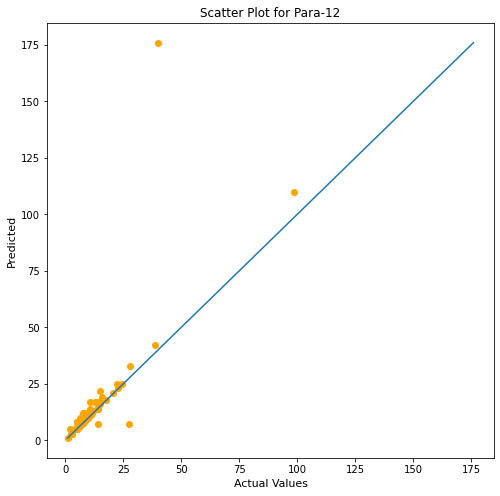

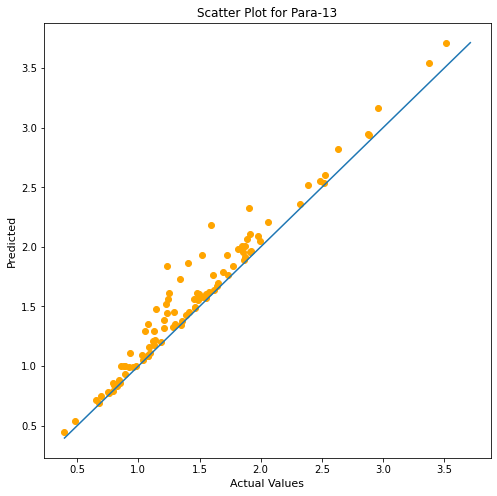

In [33]:
import matplotlib.pyplot as plt
d = {'Para-9': 10, 'Para-10': 11, 'Para-11': 12, 'Para-12': 13, 'Para-13': 14}
print(d)
for k,v in d.items():
    
    predicted = test.iloc[:,v]
    true = data_predict.iloc[:,v-10]
    plt.figure(figsize=(8,8))
    plt.scatter(true, predicted, c='orange',edgecolors=None)
    part1 = max(max(predicted), max(true))
    part2 = min(min(predicted), min(true))
    plt.plot([part1, part2], [part1, part2])
    plt.title(f'Scatter Plot for {k}')
    plt.xlabel('Actual Values', fontsize=11)
    plt.ylabel('Predicted', fontsize=11)
    plt.show()